Student Name : Alex Carter Student Number: 240355490

Sub-task 1:


My Answer:

There are a few major issues with my colleague's approach, and I would likely address them in order of severity (over a coffee) as follows:

Firstly, they are intending to use all 50 points of available data to train their model, and then take 20 out of this initial 50 and introduce this as test
data. This is a major issue because they want to predict unseen data and their test data would be ineffective at testing this, as it has
already been used as training data. I would instead suggest that they train the model on 40 points, and set 10 data points aside at the beginning
for testing. This would result in the MSE(mean squared error) being much more indicative of the model's ability to generalise unseen data. 

The next major issue is that they are intending on using a linear model to predict unseen data, when this might not be best considering their initial 
graph. There is a clear curve in this graph, that seems to form a parabola. To more accurately capture the relationship between their dependent and 
independent variables, they may want to consider using a quadratic regression model instead, as this would better handle the clear pattern in their data.

I would also briefly mention that they could improve the robustness of their model by collecting more data points, but this may be outside of the scope for
their project.                                                                                                                                                        



Sub Task 2:

Written Answer: 

  

As stated in the Task, this is a binary classification problem, and I have tested a variety of classifiers to address this problem. For all classifiers I have used the following split of data Train = 60% Validate = 20% and Test = 20%.  

My initial testing found that Perceptron and Logistical Regression models were not very effective at predicting unseen data; both of these models were only able to achieve approximately 65% accuracy on validation and test data. This suggested to me that classifiers that rely on data that is linearly separable may not be effective, and it may be worth trying different classifiers.  

I then tested a SVC (SVM with RBF Kernal) and kNN which were both able to predict test data with an accuracy of 86% on initial testing. This seemed to support my initial hypothesis that the data may not be linearly separable.  I then tried some optimisation techniques on both the SVC and kNN models. Firstly, I tested the efficacy of my models in predicting unseen data with dimensionality reduction(PCA), and found that both models accuracy peaked at between 20-30 features in the data. I then conducted further testing to find optimal values for C and K respectively.  

In conclusion, I found that the optimised kNN model classified unseen data more effectively than any other tested models, with an accuracy of 86% on test data, with the SVC slightly behind with an accuracy of 82% on test data. I can also be confident in the kNN model’s generalisation ability as it had a very low bias-variance difference of 0.007% and strong cross validation results. 

In [335]:
########## Code for Subtask 2: ##########

In [336]:
df = pd.read_csv('classification.csv', header=None)

In [337]:
#Importing the necessary libraries for this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve, 
    auc
)
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [338]:
#preparing the data for different models by splitting and scaling appropriately 
def prepare_data(df, test_size=0.2, val_size=0.25, random_state=42):
    # First split: separate out test set
    train_val_df, test_df = train_test_split(df, test_size=test_size, 
                                            random_state=random_state)
    
    # Second split: divide remaining data into train and validation
    train_df, val_df = train_test_split(train_val_df, test_size=val_size, 
                                       random_state=random_state)
    
    # Separate features and targets
    X_train = train_df.iloc[:, :-1]
    y_train = train_df.iloc[:, -1]
    
    X_val = val_df.iloc[:, :-1]
    y_val = val_df.iloc[:, -1]
    
    X_test = test_df.iloc[:, :-1]
    y_test = test_df.iloc[:, -1]
    
    # Initialize and fit scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    return (X_train_scaled, y_train, 
            X_val_scaled, y_val, 
            X_test_scaled, y_test,
            scaler)
    # Use the function
(X_train_scaled, y_train, 
 X_val_scaled, y_val, 
 X_test_scaled, y_test,
 scaler) = prepare_data(df)

Model 1 kNN with 20 dimensions, and a variety of values for K tested :

k=1
Training Accuracy: 1.000
Validation Accuracy: 0.740

k=3
Training Accuracy: 0.927
Validation Accuracy: 0.760

k=5
Training Accuracy: 0.927
Validation Accuracy: 0.780

k=7
Training Accuracy: 0.893
Validation Accuracy: 0.780

k=9
Training Accuracy: 0.900
Validation Accuracy: 0.780

k=11
Training Accuracy: 0.887
Validation Accuracy: 0.820

k=13
Training Accuracy: 0.887
Validation Accuracy: 0.840

k=15
Training Accuracy: 0.887
Validation Accuracy: 0.860

k=17
Training Accuracy: 0.880
Validation Accuracy: 0.800

k=19
Training Accuracy: 0.867
Validation Accuracy: 0.840

k=21
Training Accuracy: 0.860
Validation Accuracy: 0.840

k=23
Training Accuracy: 0.833
Validation Accuracy: 0.840

k=25
Training Accuracy: 0.860
Validation Accuracy: 0.800

k=27
Training Accuracy: 0.833
Validation Accuracy: 0.800

k=29
Training Accuracy: 0.840
Validation Accuracy: 0.760



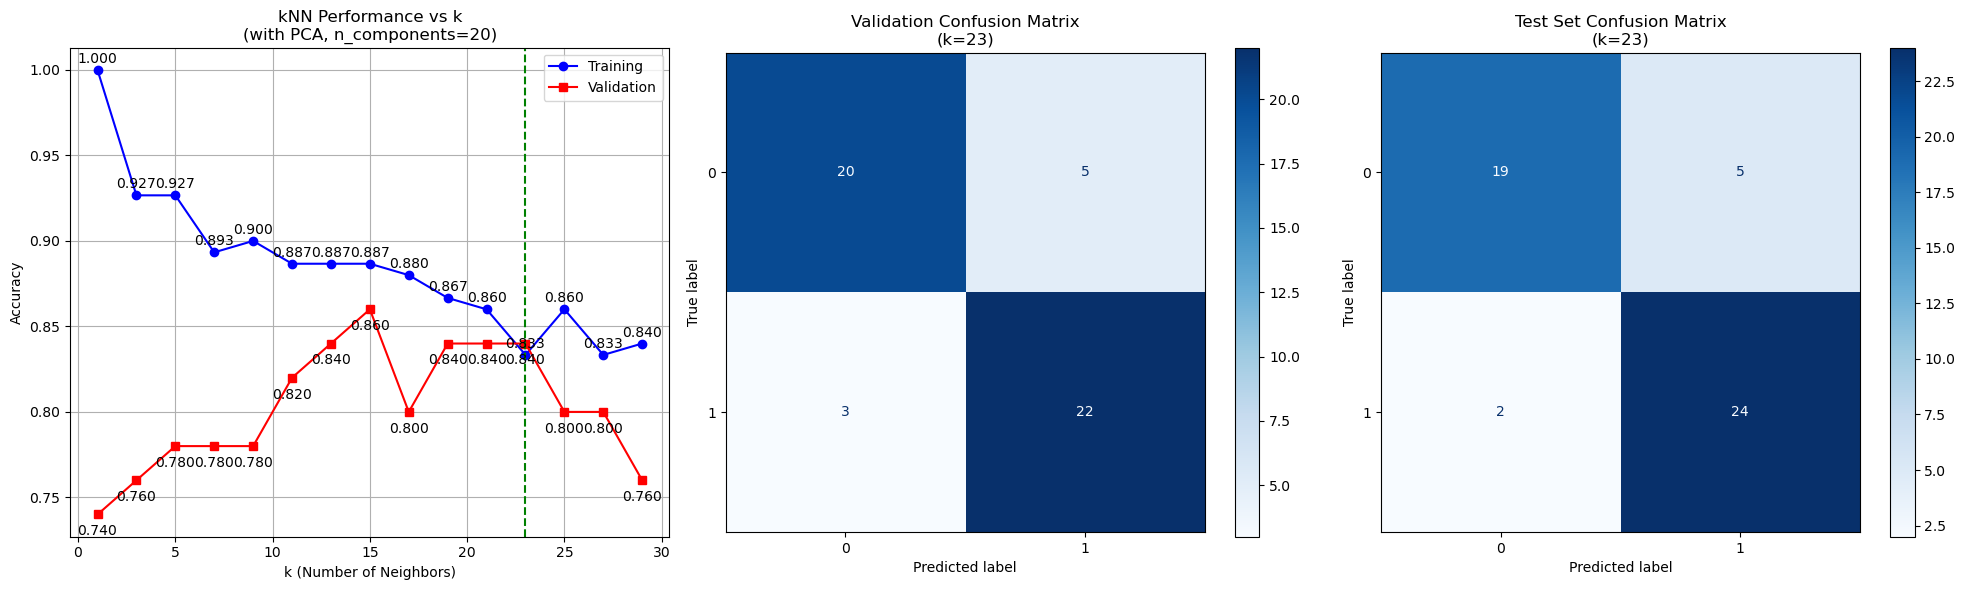


Optimal k value (best bias-variance trade-off): 23
Training accuracy at k=23: 0.833
Validation accuracy at k=23: 0.840
Test accuracy at k=23: 0.860
Bias-variance difference: 0.007

Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84        24
         1.0       0.83      0.92      0.87        26

    accuracy                           0.86        50
   macro avg       0.87      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50



In [340]:
#Code for kNN model with 20 dimensions, and a variety of values of k

def test_k_values(X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test,
                  n_components=20, k_range=range(1, 31, 2)):

    # Reduce dimensionality using PCA
    pca = PCA(n_components=n_components)
    X_train_reduced = pca.fit_transform(X_train_scaled)
    X_val_reduced = pca.transform(X_val_scaled)
    X_test_reduced = pca.transform(X_test_scaled)
    
    train_accuracies = []
    val_accuracies = []
    k_values = []
    
    # Store predictions for optimal k
    best_val_pred = None
    min_diff = float('inf')
    
    for k in k_range:
        # Train and evaluate kNN
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_reduced, y_train)
        
        # Get predictions and accuracies
        train_pred = knn.predict(X_train_reduced)
        val_pred = knn.predict(X_val_reduced)
        
        train_accuracy = accuracy_score(y_train, train_pred)
        val_accuracy = accuracy_score(y_val, val_pred)
        
        # Store predictions if this k gives best bias-variance trade-off
        curr_diff = abs(train_accuracy - val_accuracy)
        if curr_diff < min_diff:
            min_diff = curr_diff
            best_val_pred = val_pred
            best_k = k
        
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        k_values.append(k)
        
        print(f"k={k}")
        print(f"Training Accuracy: {train_accuracy:.3f}")
        print(f"Validation Accuracy: {val_accuracy:.3f}\n")
    
    # After finding optimal k, evaluate on test set
    optimal_knn = KNeighborsClassifier(n_neighbors=best_k)
    optimal_knn.fit(X_train_reduced, y_train)
    test_pred = optimal_knn.predict(X_test_reduced)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Create figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
    
    # First subplot: k vs accuracy
    ax1.plot(k_values, train_accuracies, marker='o', label='Training', color='blue')
    ax1.plot(k_values, val_accuracies, marker='s', label='Validation', color='red')
    ax1.set_xlabel('k (Number of Neighbors)')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('kNN Performance vs k\n(with PCA, n_components=20)')
    ax1.grid(True)
    ax1.legend()
    
    # Calculate bias-variance trade-off metric
    bias_variance_diff = np.abs(np.array(train_accuracies) - np.array(val_accuracies))
    optimal_k = k_values[np.argmin(bias_variance_diff)]
    
    # Add vertical line for optimal k
    ax1.axvline(x=optimal_k, color='green', linestyle='--', 
                label=f'Optimal k={optimal_k}')
    
    # Add value labels
    for i, (j1, j2) in enumerate(zip(train_accuracies, val_accuracies)):
        ax1.annotate(f"{j1:.3f}", 
                    xy=(k_values[i], j1), 
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center')
        ax1.annotate(f"{j2:.3f}", 
                    xy=(k_values[i], j2), 
                    xytext=(0, -15),
                    textcoords='offset points',
                    ha='center')
    
    # Second subplot: validation confusion matrix
    cm_val = confusion_matrix(y_val, best_val_pred)
    disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val)
    disp_val.plot(ax=ax2, cmap='Blues')
    ax2.set_title(f'Validation Confusion Matrix\n(k={optimal_k})')
    
    # Third subplot: test confusion matrix
    cm_test = confusion_matrix(y_test, test_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    disp_test.plot(ax=ax3, cmap='Blues')
    ax3.set_title(f'Test Set Confusion Matrix\n(k={optimal_k})')
    
    plt.tight_layout()
    plt.show()
    
    # Print performance metrics including test accuracy
    print(f"\nOptimal k value (best bias-variance trade-off): {optimal_k}")
    print(f"Training accuracy at k={optimal_k}: {train_accuracies[k_values.index(optimal_k)]:.3f}")
    print(f"Validation accuracy at k={optimal_k}: {val_accuracies[k_values.index(optimal_k)]:.3f}")
    print(f"Test accuracy at k={optimal_k}: {test_accuracy:.3f}")
    print(f"Bias-variance difference: {bias_variance_diff[k_values.index(optimal_k)]:.3f}")
    
    # Print classification report for test set
    print("\nClassification Report on Test Set:")
    print(classification_report(y_test, test_pred))
    
    return k_values, train_accuracies, val_accuracies, optimal_k, test_accuracy

# Use the function with your prepared data
k_values, train_accuracies, val_accuracies, optimal_k, test_accuracy = test_k_values(
    X_train_scaled, y_train, 
    X_val_scaled, y_val,
    X_test_scaled, y_test,  # Add test data
    n_components=20)

SVM with rbf kernal with 20 dimensions and C=0.695

Cumulative explained variance ratio for 20 components:
0.873

Model Performance:
Training Accuracy: 0.927
Validation Accuracy: 0.840
Test Accuracy: 0.820

Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80        24
         1.0       0.79      0.88      0.84        26

    accuracy                           0.82        50
   macro avg       0.83      0.82      0.82        50
weighted avg       0.82      0.82      0.82        50



<Figure size 800x600 with 0 Axes>

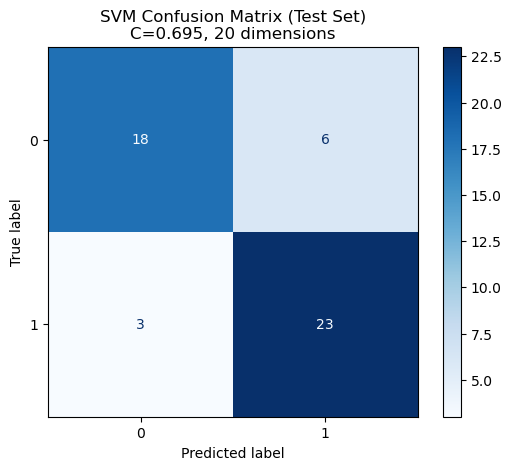

In [342]:
#Code forSVM with rbf kernal with 20 dimensions and C=0.695

# Use the prepare_data function
(X_train_scaled, y_train, 
 X_val_scaled, y_val, 
 X_test_scaled, y_test,
 scaler) = prepare_data(df)

# Reduce dimensions to 20 using PCA
pca = PCA(n_components=20)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_val_reduced = pca.transform(X_val_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# Print explained variance ratio for 20 components
print("Cumulative explained variance ratio for 20 components:")
print(f"{np.sum(pca.explained_variance_ratio_):.3f}")

# Create and train the optimized SVM model
svm_optimized = SVC(kernel='rbf', C=0.695, random_state=42)
svm_optimized.fit(X_train_reduced, y_train)

# Get predictions for all sets
train_pred = svm_optimized.predict(X_train_reduced)
val_pred = svm_optimized.predict(X_val_reduced)
test_pred = svm_optimized.predict(X_test_reduced)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, train_pred)
val_accuracy = accuracy_score(y_val, val_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("\nModel Performance:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Validation Accuracy: {val_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

# Detailed classification report for test set
print("\nClassification Report on Test Set:")
print(classification_report(y_test, test_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('SVM Confusion Matrix (Test Set)\nC=0.695, 20 dimensions')
plt.show()

In [343]:
########## Exploratory Testing : ##########


I have included the following section, simply as evidence that I have carried out the investigation which I reference in my written answer, I suspect this is likely unnecessary so feel free to disregard the code beyond this point. 

Perceptron Performance:
Validation Accuracy: 0.660
Test Accuracy: 0.620

Validation Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.68      0.67        25
         1.0       0.67      0.64      0.65        25

    accuracy                           0.66        50
   macro avg       0.66      0.66      0.66        50
weighted avg       0.66      0.66      0.66        50



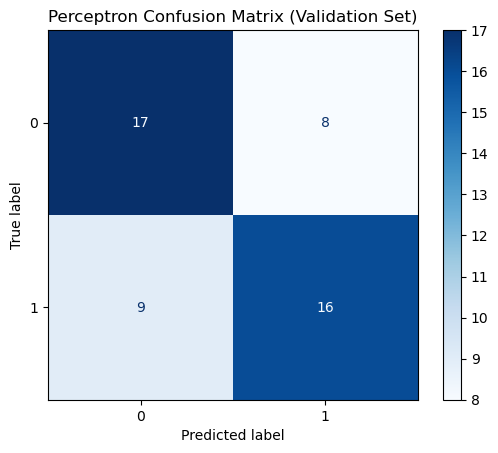

In [345]:
#Initial Perceptron test

# Prepare the data using existing function
(X_train_scaled, y_train, 
 X_val_scaled, y_val, 
 X_test_scaled, y_test,
 scaler) = prepare_data(df)

def train_evaluate_perceptron(X_train_scaled, y_train, 
                            X_val_scaled, y_val,
                            X_test_scaled, y_test,
                            random_state=42):
    # Create and train the Perceptron
    p = Perceptron(random_state=random_state)
    p.fit(X_train_scaled, y_train)
    
    # Make predictions on validation and test sets only
    val_pred = p.predict(X_val_scaled)
    test_pred = p.predict(X_test_scaled)
    
    # Calculate accuracies
    val_accuracy = accuracy_score(y_val, val_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Print results
    print("Perceptron Performance:")
    print(f"Validation Accuracy: {val_accuracy:.3f}")
    print(f"Test Accuracy: {test_accuracy:.3f}")
    
    # Detailed validation set performance
    print("\nValidation Set Classification Report:")
    print(classification_report(y_val, val_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_val, val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title('Perceptron Confusion Matrix (Validation Set)')
    plt.show()
    
    return p, val_accuracy, test_accuracy

# Use the function with the prepared data
perceptron_model, perceptron_val_acc, perceptron_test_acc = train_evaluate_perceptron(
    X_train_scaled, y_train,
    X_val_scaled, y_val,
    X_test_scaled, y_test
)

In [346]:
#Initial Logistic Regression test

def train_evaluate_logistic(X_train_scaled, y_train, 
                          X_val_scaled, y_val,
                          X_test_scaled, y_test,
                          random_state=42):
    # Create and train the Logistic Regression model
    lr = LogisticRegression(random_state=random_state, 
                           max_iter=1000,)
    lr.fit(X_train_scaled, y_train)
    
    # Make predictions on validation and test sets
    val_pred = lr.predict(X_val_scaled)
    test_pred = lr.predict(X_test_scaled)
    
    # Calculate probabilities
    val_prob = lr.predict_proba(X_val_scaled)
    
    # Calculate accuracies
    val_accuracy = accuracy_score(y_val, val_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Print results
    print("Logistic Regression Performance:")
    print(f"Validation Accuracy: {val_accuracy:.3f}")
    print(f"Test Accuracy: {test_accuracy:.3f}")
    
    # Detailed validation set performance
    print("\nValidation Set Classification Report:")
    print(classification_report(y_val, val_pred))
    
    return lr, val_accuracy, test_accuracy

# Use the function with your prepared data
log_model, log_val_acc, log_test_acc = train_evaluate_logistic(
    X_train_scaled, y_train,
    X_val_scaled, y_val,
    X_test_scaled, y_test
)

Logistic Regression Performance:
Validation Accuracy: 0.640
Test Accuracy: 0.620

Validation Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64        25
         1.0       0.64      0.64      0.64        25

    accuracy                           0.64        50
   macro avg       0.64      0.64      0.64        50
weighted avg       0.64      0.64      0.64        50



Linear Models:

Perceptron Results:
Perceptron Performance:
Validation Accuracy: 0.660
Test Accuracy: 0.620

Validation Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.68      0.67        25
         1.0       0.67      0.64      0.65        25

    accuracy                           0.66        50
   macro avg       0.66      0.66      0.66        50
weighted avg       0.66      0.66      0.66        50



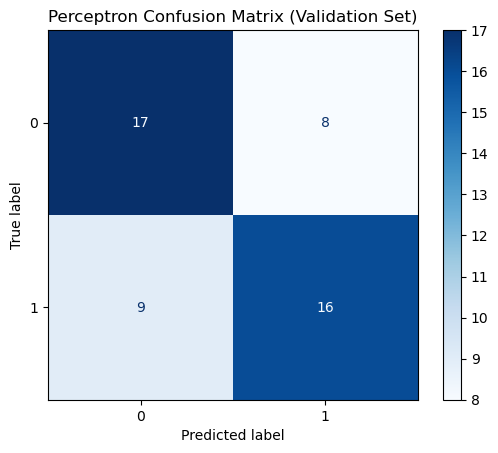


Logistic Regression Results:
Logistic Regression Performance:
Validation Accuracy: 0.640
Test Accuracy: 0.620

Validation Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64        25
         1.0       0.64      0.64      0.64        25

    accuracy                           0.64        50
   macro avg       0.64      0.64      0.64        50
weighted avg       0.64      0.64      0.64        50


Non-linear Model:

SVM Results:
SVM (RBF Kernel) Performance:
Validation Accuracy: 0.780
Test Accuracy: 0.860

Validation Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77        25
         1.0       0.75      0.84      0.79        25

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



In [347]:
def train_evaluate_svm(X_train_scaled, y_train, 
                      X_val_scaled, y_val,
                      X_test_scaled, y_test,
                      random_state=42):
    # Create and train the SVM
    svm = SVC(kernel='rbf', random_state=random_state)
    svm.fit(X_train_scaled, y_train)
    
    # Make predictions
    val_pred = svm.predict(X_val_scaled)
    test_pred = svm.predict(X_test_scaled)
    
    # Calculate accuracies
    val_accuracy = accuracy_score(y_val, val_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    print("SVM (RBF Kernel) Performance:")
    print(f"Validation Accuracy: {val_accuracy:.3f}")
    print(f"Test Accuracy: {test_accuracy:.3f}")
    
    print("\nValidation Set Classification Report:")
    print(classification_report(y_val, val_pred))
    
    return svm, val_accuracy, test_accuracy

# Compare all three models
print("Linear Models:")
print("\nPerceptron Results:")
_, percep_val_acc, _ = train_evaluate_perceptron(X_train_scaled, y_train,
                                                X_val_scaled, y_val,
                                                X_test_scaled, y_test)

print("\nLogistic Regression Results:")
_, log_val_acc, _ = train_evaluate_logistic(X_train_scaled, y_train,
                                          X_val_scaled, y_val,
                                          X_test_scaled, y_test)

print("\nNon-linear Model:")
print("\nSVM Results:")
_, svm_val_acc, _ = train_evaluate_svm(X_train_scaled, y_train,
                                     X_val_scaled, y_val,
                                     X_test_scaled, y_test)

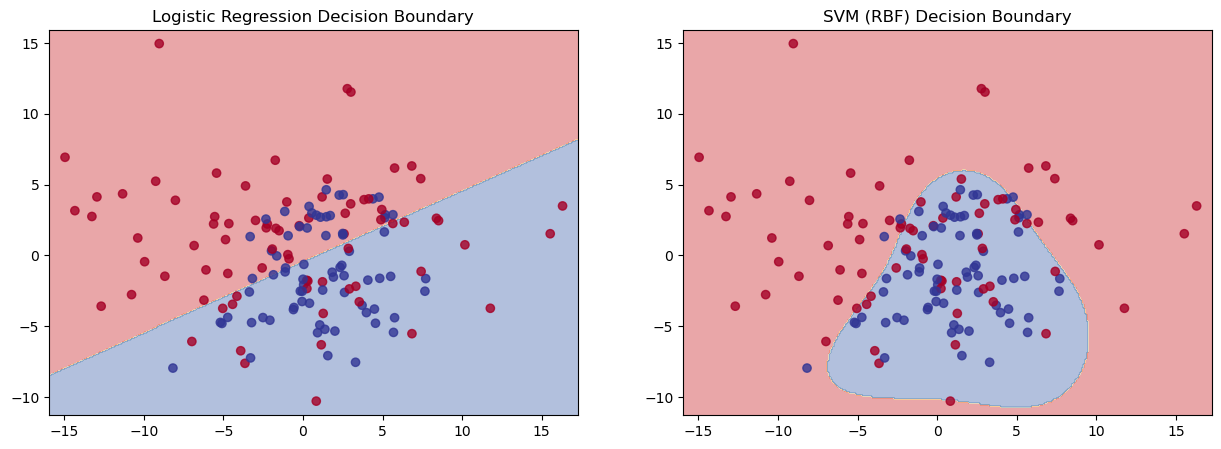

In [348]:
def visualize_decision_boundaries():
    # Reduce to 2D for visualization
    pca = PCA(n_components=2)
    X_train_2d = pca.fit_transform(X_train_scaled)
    X_val_2d = pca.transform(X_val_scaled)
    lr_2d = LogisticRegression(random_state=42)
    lr_2d.fit(X_train_2d, y_train)
    svm_2d = SVC(kernel='rbf', random_state=42)
    svm_2d.fit(X_train_2d, y_train)
    x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
    y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Logistic Regression with custom colors
    Z_lr = lr_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_lr = Z_lr.reshape(xx.shape)
    ax1.contourf(xx, yy, Z_lr, alpha=0.4, cmap='RdYlBu')  # Changed colormap
    scatter1 = ax1.scatter(X_train_2d[:, 0], X_train_2d[:, 1], 
                          c=y_train, cmap='RdYlBu', alpha=0.8)
    ax1.set_title('Logistic Regression Decision Boundary')

    # SVM with custom colors
    Z_svm = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_svm = Z_svm.reshape(xx.shape)
    ax2.contourf(xx, yy, Z_svm, alpha=0.4, cmap='RdYlBu')  # Changed colormap
    scatter2 = ax2.scatter(X_train_2d[:, 0], X_train_2d[:, 1], 
                          c=y_train, cmap='RdYlBu', alpha=0.8)
    ax2.set_title('SVM (RBF) Decision Boundary')

    plt.show()
# Create visualization
visualize_decision_boundaries()

kNN Model Performance:

Validation Set Results:
Accuracy: 0.800

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        25
         1.0       0.80      0.80      0.80        25

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



<Figure size 800x600 with 0 Axes>

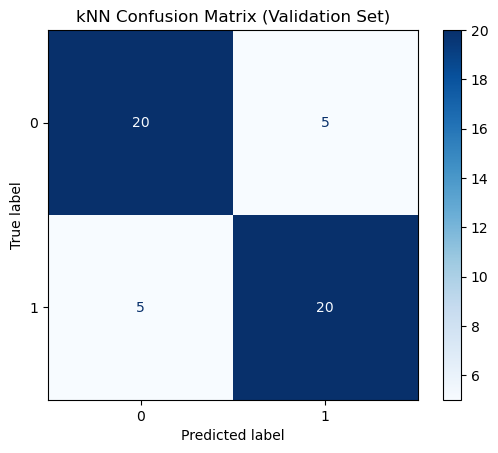


Test Set Results:
Accuracy: 0.860


In [349]:
#kNN model test

# Prepare the data using our existing function
(X_train_scaled, y_train, 
 X_val_scaled, y_val, 
 X_test_scaled, y_test,
 scaler) = prepare_data(df)

# Create and train kNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
val_pred = knn.predict(X_val_scaled)
test_pred = knn.predict(X_test_scaled)

# Print results
print("kNN Model Performance:")
print("\nValidation Set Results:")
print(f"Accuracy: {accuracy_score(y_val, val_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_val, val_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('kNN Confusion Matrix (Validation Set)')
plt.show()

# Test set results
print("\nTest Set Results:")
print(f"Accuracy: {accuracy_score(y_test, test_pred):.3f}")

Dimensions: 5
Training Accuracy: 0.940
Validation Accuracy: 0.800

Dimensions: 10
Training Accuracy: 0.913
Validation Accuracy: 0.760

Dimensions: 15
Training Accuracy: 0.933
Validation Accuracy: 0.740

Dimensions: 20
Training Accuracy: 0.927
Validation Accuracy: 0.780

Dimensions: 25
Training Accuracy: 0.907
Validation Accuracy: 0.800

Dimensions: 30
Training Accuracy: 0.920
Validation Accuracy: 0.820

Dimensions: 35
Training Accuracy: 0.900
Validation Accuracy: 0.800

Dimensions: 40
Training Accuracy: 0.927
Validation Accuracy: 0.820

Dimensions: 45
Training Accuracy: 0.927
Validation Accuracy: 0.800

Dimensions: 50
Training Accuracy: 0.927
Validation Accuracy: 0.800

Dimensions: 55
Training Accuracy: 0.927
Validation Accuracy: 0.800

Dimensions: 60
Training Accuracy: 0.927
Validation Accuracy: 0.800

Dimensions: 65
Training Accuracy: 0.927
Validation Accuracy: 0.800

Dimensions: 70
Training Accuracy: 0.927
Validation Accuracy: 0.800

Dimensions: 75
Training Accuracy: 0.927
Validatio

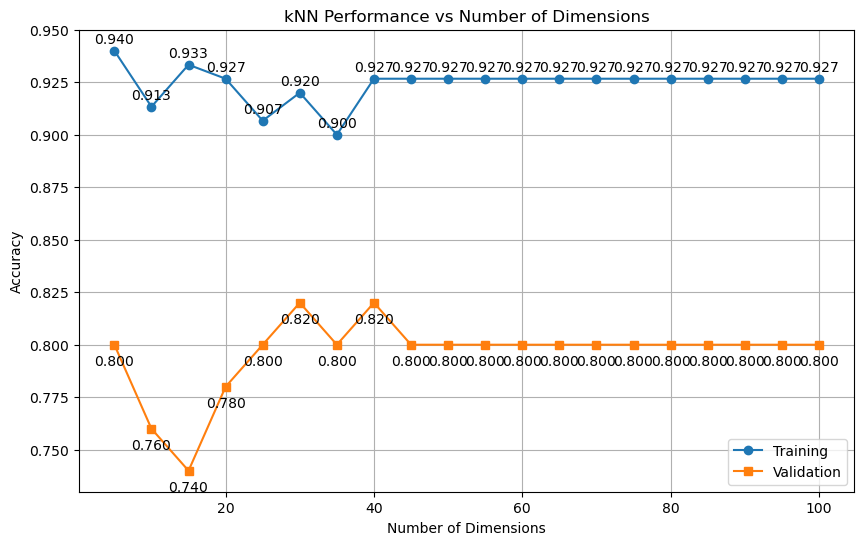


Optimal number of dimensions: 30
Best validation accuracy: 0.820


In [350]:
#Testing Dimensions for kNN


def test_dimensions_knn(X_train_scaled, y_train, X_val_scaled, y_val, 
                       dim_range=range(5, 101, 5), n_neighbors=5):
    train_accuracies = []
    val_accuracies = []
    dimensions = []
    
    for n_components in dim_range:
        # Skip if n_components is larger than possible
        if n_components > X_train_scaled.shape[1]:
            break
            
        # Reduce dimensionality
        pca = PCA(n_components=n_components)
        X_train_reduced = pca.fit_transform(X_train_scaled)
        X_val_reduced = pca.transform(X_val_scaled)
        
        # Train and evaluate kNN
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train_reduced, y_train)
        
        # Get training and validation accuracy
        train_accuracy = accuracy_score(y_train, knn.predict(X_train_reduced))
        val_accuracy = accuracy_score(y_val, knn.predict(X_val_reduced))
        
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        dimensions.append(n_components)
        
        print("Dimensions:", n_components)
        print("Training Accuracy: {:.3f}".format(train_accuracy))
        print("Validation Accuracy: {:.3f}\n".format(val_accuracy))
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(dimensions, train_accuracies, marker='o', label='Training')
    plt.plot(dimensions, val_accuracies, marker='s', label='Validation')
    plt.xlabel('Number of Dimensions')
    plt.ylabel('Accuracy')
    plt.title('kNN Performance vs Number of Dimensions')
    plt.grid(True)
    plt.legend()
    
    # Add value labels
    for i, j in zip(dimensions, train_accuracies):
        plt.annotate("{:.3f}".format(j), 
                    xy=(i, j), 
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center')
    for i, j in zip(dimensions, val_accuracies):
        plt.annotate("{:.3f}".format(j), 
                    xy=(i, j), 
                    xytext=(0, -15),
                    textcoords='offset points',
                    ha='center')
    
    plt.show()
    
    return dimensions, train_accuracies, val_accuracies

# Use our existing prepared data
(X_train_scaled, y_train, 
 X_val_scaled, y_val, 
 X_test_scaled, y_test,
 scaler) = prepare_data(df)

# Test different dimensions
dimensions, train_accuracies, val_accuracies = test_dimensions_knn(
    X_train_scaled, y_train, 
    X_val_scaled, y_val
)

# Find optimal number of dimensions
optimal_dims = dimensions[np.argmax(val_accuracies)]
print("\nOptimal number of dimensions:", optimal_dims)
print("Best validation accuracy: {:.3f}".format(max(val_accuracies)))

Dimensions: 5
Training Accuracy: 0.933
Validation Accuracy: 0.800

Dimensions: 10
Training Accuracy: 0.933
Validation Accuracy: 0.820

Dimensions: 15
Training Accuracy: 0.940
Validation Accuracy: 0.800

Dimensions: 20
Training Accuracy: 0.953
Validation Accuracy: 0.840

Dimensions: 25
Training Accuracy: 0.953
Validation Accuracy: 0.840

Dimensions: 30
Training Accuracy: 0.947
Validation Accuracy: 0.820

Dimensions: 35
Training Accuracy: 0.947
Validation Accuracy: 0.800

Dimensions: 40
Training Accuracy: 0.947
Validation Accuracy: 0.780

Dimensions: 45
Training Accuracy: 0.947
Validation Accuracy: 0.780

Dimensions: 50
Training Accuracy: 0.947
Validation Accuracy: 0.780

Dimensions: 55
Training Accuracy: 0.947
Validation Accuracy: 0.780

Dimensions: 60
Training Accuracy: 0.947
Validation Accuracy: 0.780

Dimensions: 65
Training Accuracy: 0.947
Validation Accuracy: 0.780

Dimensions: 70
Training Accuracy: 0.947
Validation Accuracy: 0.780

Dimensions: 75
Training Accuracy: 0.947
Validatio

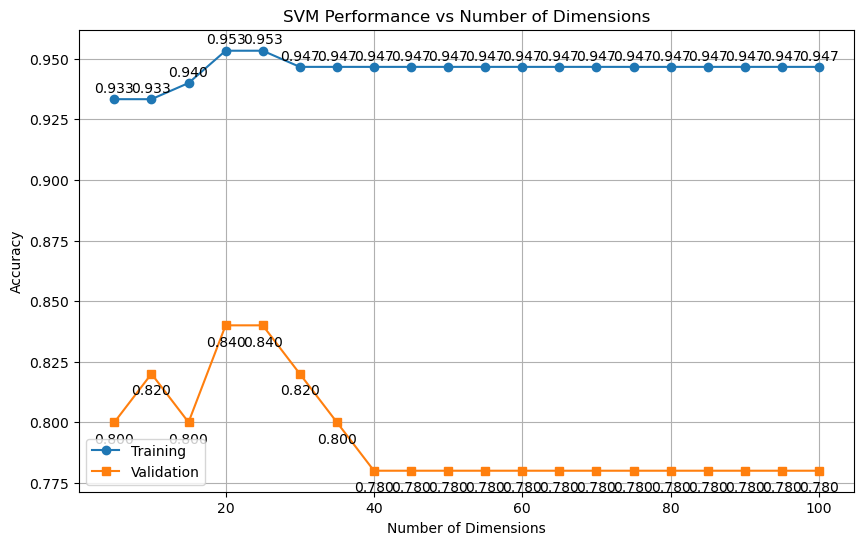


Optimal number of dimensions: 20
Best validation accuracy: 0.840


In [351]:
#Testing Dimensions for SVC

def test_dimensions_svm(X_train_scaled, y_train, X_val_scaled, y_val, 
                       dim_range=range(5, 101, 5)):

    train_accuracies = []
    val_accuracies = []
    dimensions = []
    
    for n_components in dim_range:
        # Skip if n_components is larger than possible
        if n_components > X_train_scaled.shape[1]:
            break
            
        # Reduce dimensionality
        pca = PCA(n_components=n_components)
        X_train_reduced = pca.fit_transform(X_train_scaled)
        X_val_reduced = pca.transform(X_val_scaled)
        
        # Train and evaluate SVM
        svc = SVC(kernel='rbf', random_state=42)
        svc.fit(X_train_reduced, y_train)
        
        # Get training and validation accuracy
        train_accuracy = accuracy_score(y_train, svc.predict(X_train_reduced))
        val_accuracy = accuracy_score(y_val, svc.predict(X_val_reduced))
        
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        dimensions.append(n_components)
        
        print(f"Dimensions: {n_components}")
        print(f"Training Accuracy: {train_accuracy:.3f}")
        print(f"Validation Accuracy: {val_accuracy:.3f}\n")
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(dimensions, train_accuracies, marker='o', label='Training')
    plt.plot(dimensions, val_accuracies, marker='s', label='Validation')
    plt.xlabel('Number of Dimensions')
    plt.ylabel('Accuracy')
    plt.title('SVM Performance vs Number of Dimensions')
    plt.grid(True)
    plt.legend()
    
    # Add value labels
    for i, j in zip(dimensions, train_accuracies):
        plt.annotate(f'{j:.3f}', 
                    xy=(i, j), 
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center')
    for i, j in zip(dimensions, val_accuracies):
        plt.annotate(f'{j:.3f}', 
                    xy=(i, j), 
                    xytext=(0, -15),
                    textcoords='offset points',
                    ha='center')
    
    plt.show()
    
    return dimensions, train_accuracies, val_accuracies

# Test different dimensions
dimensions, train_accuracies, val_accuracies = test_dimensions_svm(
    X_train_scaled, y_train, 
    X_val_scaled, y_val
)

# Find optimal number of dimensions
optimal_dims = dimensions[np.argmax(val_accuracies)]
print(f"\nOptimal number of dimensions: {optimal_dims}")
print(f"Best validation accuracy: {max(val_accuracies):.3f}")

C value: 0.001
Training Accuracy: 0.513
Validation Accuracy: 0.500

C value: 0.002
Training Accuracy: 0.513
Validation Accuracy: 0.500

C value: 0.004
Training Accuracy: 0.513
Validation Accuracy: 0.500

C value: 0.009
Training Accuracy: 0.513
Validation Accuracy: 0.500

C value: 0.018
Training Accuracy: 0.513
Validation Accuracy: 0.500

C value: 0.038
Training Accuracy: 0.513
Validation Accuracy: 0.500

C value: 0.078
Training Accuracy: 0.540
Validation Accuracy: 0.500

C value: 0.162
Training Accuracy: 0.853
Validation Accuracy: 0.720

C value: 0.336
Training Accuracy: 0.893
Validation Accuracy: 0.740

C value: 0.695
Training Accuracy: 0.927
Validation Accuracy: 0.840

C value: 1.438
Training Accuracy: 0.960
Validation Accuracy: 0.840

C value: 2.976
Training Accuracy: 0.987
Validation Accuracy: 0.840

C value: 6.158
Training Accuracy: 0.993
Validation Accuracy: 0.820

C value: 12.743
Training Accuracy: 1.000
Validation Accuracy: 0.820

C value: 26.367
Training Accuracy: 1.000
Valida

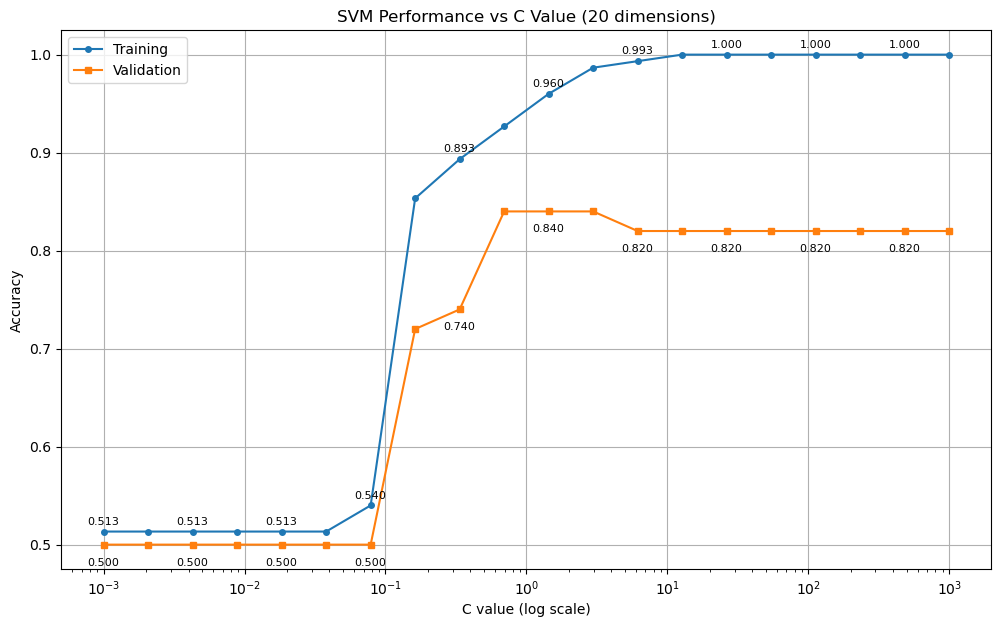


Optimal C value: 0.695
Best validation accuracy: 0.840


In [352]:
# Testing SVC for best C value
pca = PCA(n_components=20)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_val_reduced = pca.transform(X_val_scaled)
X_test_reduced = pca.transform(X_test_scaled)

def test_C_values_svm(X_train_reduced, y_train, X_val_reduced, y_val, 
                      C_range=np.logspace(-3, 3, 20)):
    train_accuracies = []
    val_accuracies = []
    
    for C in C_range:
        # Train and evaluate SVM
        svc = SVC(kernel='rbf', C=C, random_state=42)
        svc.fit(X_train_reduced, y_train)
        
        # Get training and validation accuracy
        train_accuracy = accuracy_score(y_train, svc.predict(X_train_reduced))
        val_accuracy = accuracy_score(y_val, svc.predict(X_val_reduced))
        
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        print(f"C value: {C:.3f}")
        print(f"Training Accuracy: {train_accuracy:.3f}")
        print(f"Validation Accuracy: {val_accuracy:.3f}\n")
    
    # Plot results
    plt.figure(figsize=(12, 7))
    plt.semilogx(C_range, train_accuracies, marker='o', label='Training', markersize=4)
    plt.semilogx(C_range, val_accuracies, marker='s', label='Validation', markersize=4)
    plt.xlabel('C value (log scale)')
    plt.ylabel('Accuracy')
    plt.title('SVM Performance vs C Value (20 dimensions)')
    plt.grid(True)
    plt.legend()
    
    # Add value labels
    step = 2
    for i, j in list(zip(C_range, train_accuracies))[::step]:
        plt.annotate(f'{j:.3f}', 
                    xy=(i, j), 
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center',
                    fontsize=8)
    for i, j in list(zip(C_range, val_accuracies))[::step]:
        plt.annotate(f'{j:.3f}', 
                    xy=(i, j), 
                    xytext=(0, -15),
                    textcoords='offset points',
                    ha='center',
                    fontsize=8)
    
    plt.show()
    
    return C_range, train_accuracies, val_accuracies

# Actually call the function
C_values, train_accuracies, val_accuracies = test_C_values_svm(
    X_train_reduced, y_train, 
    X_val_reduced, y_val
)

# Find and print optimal C value
optimal_C = C_values[np.argmax(val_accuracies)]
print(f"\nOptimal C value: {optimal_C:.3f}")
print(f"Best validation accuracy: {max(val_accuracies):.3f}")

Cumulative explained variance ratio for 20 components:
0.873

Model Performance:
Training Accuracy: 0.927
Validation Accuracy: 0.840
Test Accuracy: 0.820

Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80        24
         1.0       0.79      0.88      0.84        26

    accuracy                           0.82        50
   macro avg       0.83      0.82      0.82        50
weighted avg       0.82      0.82      0.82        50



<Figure size 800x600 with 0 Axes>

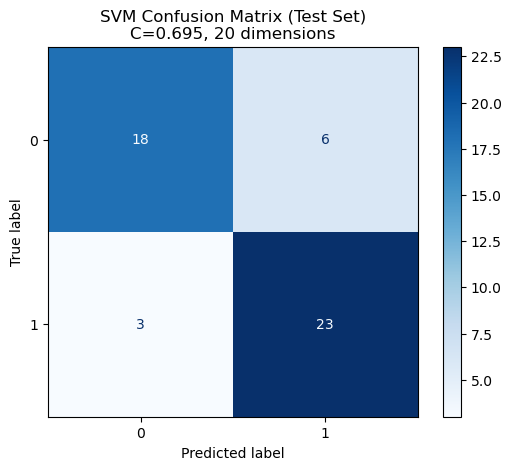

In [353]:
#Testing SVC with optimal Parameter

# Use the prepare_data function
(X_train_scaled, y_train, 
 X_val_scaled, y_val, 
 X_test_scaled, y_test,
 scaler) = prepare_data(df)

# Reduce dimensions to 20 using PCA
pca = PCA(n_components=20)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_val_reduced = pca.transform(X_val_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# Print explained variance ratio for 20 components
print("Cumulative explained variance ratio for 20 components:")
print(f"{np.sum(pca.explained_variance_ratio_):.3f}")

# Create and train the optimized SVM model
svm_optimized = SVC(kernel='rbf', C=0.695, random_state=42)
svm_optimized.fit(X_train_reduced, y_train)

# Get predictions for all sets
train_pred = svm_optimized.predict(X_train_reduced)
val_pred = svm_optimized.predict(X_val_reduced)
test_pred = svm_optimized.predict(X_test_reduced)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, train_pred)
val_accuracy = accuracy_score(y_val, val_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("\nModel Performance:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Validation Accuracy: {val_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

# Detailed classification report for test set
print("\nClassification Report on Test Set:")
print(classification_report(y_test, test_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('SVM Confusion Matrix (Test Set)\nC=0.695, 20 dimensions')
plt.show()

Cumulative explained variance ratio for 20 components:
0.873

Model Performance:
Training Accuracy: 0.927
Validation Accuracy: 0.840
Test Accuracy: 0.820

Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80        24
         1.0       0.79      0.88      0.84        26

    accuracy                           0.82        50
   macro avg       0.83      0.82      0.82        50
weighted avg       0.82      0.82      0.82        50



<Figure size 800x600 with 0 Axes>

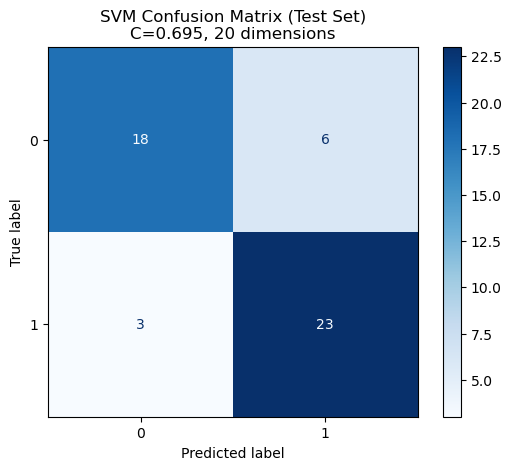

In [354]:
#parameterized SVM with RBF Kernal 

# Use the prepare_data function
(X_train_scaled, y_train, 
 X_val_scaled, y_val, 
 X_test_scaled, y_test,
 scaler) = prepare_data(df)

# Reduce dimensions to 20 using PCA
pca = PCA(n_components=20)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_val_reduced = pca.transform(X_val_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# Print explained variance ratio for 20 components
print("Cumulative explained variance ratio for 20 components:")
print(f"{np.sum(pca.explained_variance_ratio_):.3f}")

# Create and train the optimized SVM model
svm_optimized = SVC(kernel='rbf', C=0.695, random_state=42)
svm_optimized.fit(X_train_reduced, y_train)

# Get predictions for all sets
train_pred = svm_optimized.predict(X_train_reduced)
val_pred = svm_optimized.predict(X_val_reduced)
test_pred = svm_optimized.predict(X_test_reduced)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, train_pred)
val_accuracy = accuracy_score(y_val, val_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("\nModel Performance:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Validation Accuracy: {val_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

# Detailed classification report for test set
print("\nClassification Report on Test Set:")
print(classification_report(y_test, test_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('SVM Confusion Matrix (Test Set)\nC=0.695, 20 dimensions')
plt.show()

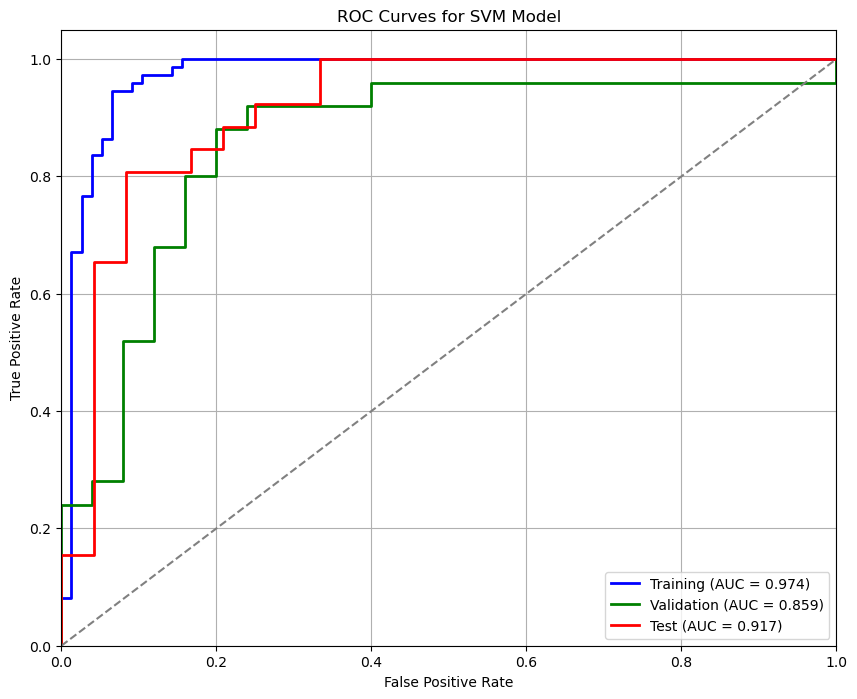


AUC Scores:
Training AUC: 0.974
Validation AUC: 0.859
Test AUC: 0.917


In [355]:
#ROC curve generation for SVM model. 

# Modify SVM to enable probability estimates
svm_optimized = SVC(kernel='rbf', C=0.695, random_state=42, probability=True)
svm_optimized.fit(X_train_reduced, y_train)

# Get probability predictions
train_probs = svm_optimized.predict_proba(X_train_reduced)[:, 1]
val_probs = svm_optimized.predict_proba(X_val_reduced)[:, 1]
test_probs = svm_optimized.predict_proba(X_test_reduced)[:, 1]

# Calculate ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
fpr_val, tpr_val, _ = roc_curve(y_val, val_probs)
fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)

# Calculate AUC scores
auc_train = auc(fpr_train, tpr_train)
auc_val = auc(fpr_val, tpr_val)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, 
         label=f'Training (AUC = {auc_train:.3f})')
plt.plot(fpr_val, tpr_val, color='green', lw=2, 
         label=f'Validation (AUC = {auc_val:.3f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, 
         label=f'Test (AUC = {auc_test:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for SVM Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores
print("\nAUC Scores:")
print(f"Training AUC: {auc_train:.3f}")
print(f"Validation AUC: {auc_val:.3f}")
print(f"Test AUC: {auc_test:.3f}")


Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5

Results for k=23:
Mean training accuracy: 0.844 (±0.012)
Mean validation accuracy: 0.785 (±0.051)

Final Test Results:
Test accuracy: 0.800

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.67      0.76        24
         1.0       0.75      0.92      0.83        26

    accuracy                           0.80        50
   macro avg       0.82      0.79      0.79        50
weighted avg       0.82      0.80      0.80        50



<Figure size 800x600 with 0 Axes>

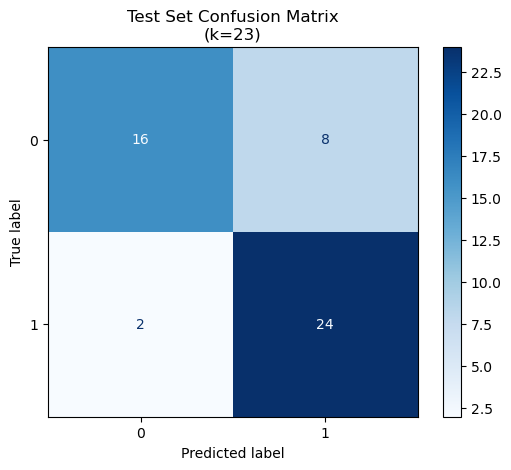

In [356]:
def test_fixed_k_with_cv(X_scaled, y, k=23, n_components=20, n_folds=5):
    """
    Tests kNN performance with fixed k=23 using PCA-reduced data and cross-validation
    """
    # Initialize KFold
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    # Initialize arrays to store results
    train_accuracies = []
    val_accuracies = []
    
    # For each fold
    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_scaled)):
        print(f"\nFold {fold_idx + 1}/{n_folds}")
        
        # Split data
        X_train_fold = X_scaled[train_idx]
        y_train_fold = y[train_idx]
        X_val_fold = X_scaled[val_idx]
        y_val_fold = y[val_idx]
        
        # Reduce dimensionality using PCA
        pca = PCA(n_components=n_components)
        X_train_reduced = pca.fit_transform(X_train_fold)
        X_val_reduced = pca.transform(X_val_fold)
        
        # Train and evaluate kNN with k=23
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_reduced, y_train_fold)
        
        # Get accuracies
        train_acc = accuracy_score(y_train_fold, knn.predict(X_train_reduced))
        val_acc = accuracy_score(y_val_fold, knn.predict(X_val_reduced))
        
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
    
    # Calculate mean and std accuracies across folds
    mean_train_accuracy = np.mean(train_accuracies)
    mean_val_accuracy = np.mean(val_accuracies)
    std_train_accuracy = np.std(train_accuracies)
    std_val_accuracy = np.std(val_accuracies)
    
    # Print results
    print(f"\nResults for k={k}:")
    print(f"Mean training accuracy: {mean_train_accuracy:.3f} (±{std_train_accuracy:.3f})")
    print(f"Mean validation accuracy: {mean_val_accuracy:.3f} (±{std_val_accuracy:.3f})")
    
    return mean_train_accuracy, mean_val_accuracy, std_train_accuracy, std_val_accuracy

# Use the function
mean_train_acc, mean_val_acc, std_train_acc, std_val_acc = test_fixed_k_with_cv(
    X_scaled=np.vstack((X_train_scaled, X_val_scaled)),  # Combine train and validation sets
    y=np.concatenate((y_train, y_val)),
    k=23,
    n_components=20,
    n_folds=5
)

# After cross-validation, evaluate on test set
pca = PCA(n_components=20)
X_train_val_reduced = pca.fit_transform(np.vstack((X_train_scaled, X_val_scaled)))
X_test_reduced = pca.transform(X_test_scaled)

final_knn = KNeighborsClassifier(n_neighbors=23)
final_knn.fit(X_train_val_reduced, np.concatenate((y_train, y_val)))
test_pred = final_knn.predict(X_test_reduced)

# Print final test results
print("\nFinal Test Results:")
print(f"Test accuracy: {accuracy_score(y_test, test_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f'Test Set Confusion Matrix\n(k=23)')
plt.show()